# Pipeline

꼭 거쳐야하는 과정을 강제할 시 사용 (ex. image Resampler, MinMaxScaler..) <br>
1. 전처리 강제
2. 뒤의 모델들에도 전처리 강제
3. 원하는 전처리 값을 넣을 수 있을 시 
fit(),predict(),transfrom(),score()을 지원하지 않는 메서드는 파이프라인에서 사용하기 애매하다 <br>

[sigmadream github ML link](https://sigmadream.github.io/practice-ml/ML06.html#%EC%A0%84%EC%B2%98%EB%A6%AC%EC%99%80-%EB%AA%A8%EB%8D%B8%EC%9D%98-%EB%A7%A4%EA%B0%9C%EB%B3%80%EC%88%98%EB%A5%BC-%EC%9C%84%ED%95%9C-%EA%B7%B8%EB%A6%AC%EB%93%9C-%EC%84%9C%EC%B9%98) <br>

In [26]:
import sklearn
import pandas as pd
from preamble import *
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [27]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier

## 전처리와 모델의 매개변수를 위한 그리드 서치( 사용 안함 )

In [28]:
# 보스턴 주택 데이터셋이 1.2 버전에서 삭제되므로 직접 다운로드합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [29]:
# 오타주의
param_grid = {'polynomialfeatures__degree':[1,2,3],
             'ridge__alpha':[0.001,0.01,0.1,1,10,100]}

In [30]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

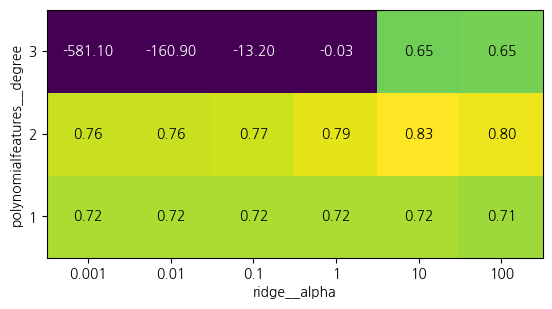

In [31]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                      xlabel="ridge__alpha", ylabel="polynomialfeatures__degree",
                      xticklabels=param_grid['ridge__alpha'],
                      yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)
plt.show() 
# 차수와 alpha 값 찾기

## 모델 선택을 위한 그리드 서치 

In [32]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [33]:
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [34]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("최적의 매개변수:\n{}\n".format(grid.best_params_))
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("테스트 세트 점수: {:.2f}".format(grid.score(X_test, y_test)))

최적의 매개변수:
{'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

최상의 교차 검증 점수: 0.99
테스트 세트 점수: 0.98
